In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./benchmark.csv', sep='\t').iloc[1:]
df

,cpu,timing,hourly_cost,total_cost,hourly_spot_cost,total_spot_cost
c5.4xlarge,8,5441,0.6800,1.027744,0.29,0.438302778
c4.4xlarge,8,6743,0.7960,1.490952,0.25,0.468263889
m5.4xlarge,8,6398,0.7680,1.364907,0.27,0.47985
Pleiades Haswell,24,6813,0.5344,1.011352,--,--
Pleiades Sandy bridge,16,9373,0.2912,0.758172,--,--


In [3]:
plt.rcParams['legend.fontsize'] = 12.5

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

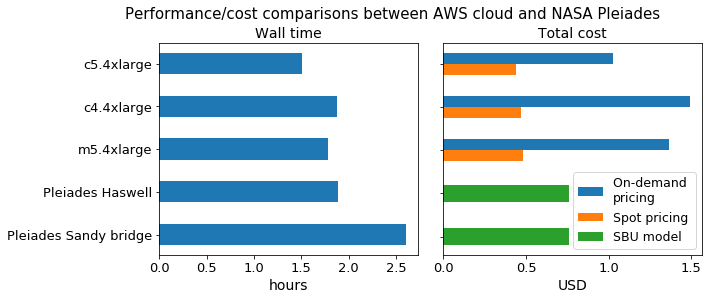

In [4]:
fig, axes = plt.subplots(1, 2, figsize=[10, 4])

ind = np.arange(5, 0, -1)  # up-down
# ind = np.arange(6)  # bottom-up

axes[0].barh(ind, df['timing']/3600, tick_label=df.index, height=0.5)
axes[0].set_title('Wall time')
axes[0].set_xlabel('hours')

axes[1].barh(ind[:3]+0.125, df['total_cost'][:3], height=0.25, label='On-demand \npricing')
axes[1].barh(ind[:3]-0.125, df['total_spot_cost'][:3].astype('float'), height=0.25, label='Spot pricing')
axes[1].barh(ind[3:], df['total_cost'][4:], height=0.4, label='SBU model')

axes[1].set_title('Total cost')
axes[1].set_xlabel('USD')
axes[1].legend(loc=4)

axes[1].set_yticks(ind)
axes[1].set_yticklabels([' '])

fig.suptitle('Performance/cost comparisons between AWS cloud and NASA Pleiades', y=1.03, fontsize=15,  x=0.55)
fig.tight_layout()
fig.savefig('benchmark.png', dpi=300, bbox_inches='tight')